In [74]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
from IPython.display import display, HTML, IFrame, YouTubeVideo

Populating the interactive namespace from numpy and matplotlib


# Salmonella run and tumble motion

In [5]:
HTML(
    """<video width="512" height="512"
    controls autoplay loop 
    src="https://storage.googleapis.com/my_slides/misc/Salmonella2Buffer1%20(bone).mp4"
    >""")

# Demonstration of effects at low Reynolds number

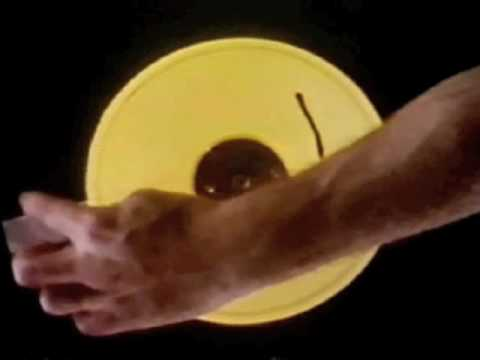

In [73]:
YouTubeVideo("QcBpDVzBPMk", start=180)

# First passage time for diffusion through a layer
Brownian motion through a layer can model passage of a virus through a mucus barrier. Assume that the layer has infinite length and width and a finite thickness $L$. That is, the layer is made up of positions $(x,y,z) \in \mathbb{R}^2\times [0, L]$ so that $z\in[0, L]$. The motion of the virus is in 3D, however, due to the symmetry of the problem, we can restrict our attention to 1D for the z-component of the motion. Assume that the virus moves by Brownian motion with diffusivity $D$. We will assume that $D=2\mu {\rm m}^2/{\rm sec}$. Mucus barriers have thickness $L$ in the range of 10-1000$\mu {\rm m}$. Assume that the virus starts at the lumen-mucus interface $Z(0) = 0$, where we will assume a reflecting boundary. We want to sample the first passage time for the virus to reach $z=L$; that is, we want to determine
$$ \tau = \inf\{t>0 \mid Z(t) \geq L, Z(0) = 0\}. $$

Mean first passage time (simulations): 629.8052999999867
Mean first passage time (exact): 625.0


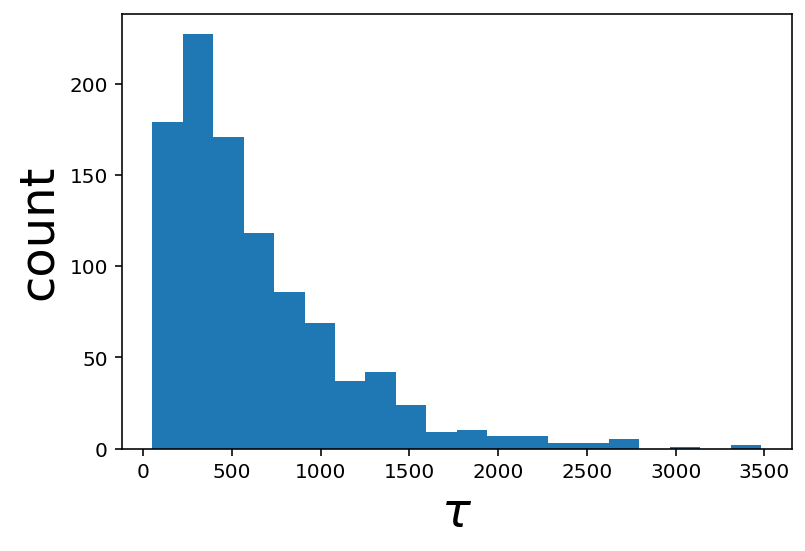

In [48]:
D = 2
sigma = sqrt(2.*D)
L = 50. 

def first_passage_time():
    dt = 0.1
    z0 = 0
    # Z = zeros(Nsteps) # we do not need to store the entire path
    # Z[0] = z0
    z = z0
    t = 0
    while True: # this will simply loop forever unless otherwise stopped in the loop
        ## if a bug ever causes a loop to continue forever, you can halt the process by
        ## pushing the 'interupt' button (looks like a stop button in the toolbar)
        z = z + sigma*sqrt(dt)*normal(0, 1, 1)
        t = t + dt
        ## reflecting boundary at z=0
        if z < 0:
            z = -z
        ## check to see if z=L has been reached
        if z >= L:
            return t ## this stops the loop and returns the time
def first_passage_time_FAST(): ## this is a faster version
    dt = 0.1
    dW_stdev = sigma*sqrt(dt)
    z0 = 0
    Nbuffer = 10000
    # Z = zeros(Nsteps) # we do not need to store the entire path
    # Z[0] = z0
    z = z0
    t = 0
    j = 0
    while True: # this will simply loop forever unless otherwise stopped in the loop
        ## if a bug ever causes a loop to continue forever, you can halt the process by
        ## pushing the 'interupt' button (looks like a stop button in the toolbar)
        if j%Nbuffer == 0:
            dW = normal(0, dW_stdev, Nbuffer)
            j = 0
        z += dW[j]
        t += dt
        j += 1
        ## reflecting boundary at z=0
        if z < 0:
            z = -z
        ## check to see if z=L has been reached
        if z >= L:
            return t ## this stops the loop and returns the time
## we want to collect many samples of the first passage time in an array
Nsamples = 1000
## Way 1: get samples using a for loop
T = zeros(Nsamples) ## to store samples of first passage time
for n in arange(Nsamples):
    T[n] = first_passage_time_FAST()
## Way 2: this is a short hand way of computing T, same as the three lines in Way 1
T = array([first_passage_time() for n in arange(Nsamples)]) 

## Figure
figure(1, [6, 4])    
hist(T, bins=20)
xlabel(r'$\tau$', fontsize=24)
ylabel('count', fontsize=24);

print('Mean first passage time (simulations):', T.mean())
print('Mean first passage time (exact):', L**2/(2*D))